In [1]:
from PIL import Image

In [ ]:
# Carregar a imagem
caminho_imagem = 'C:\\Users\\anton\\OneDrive\\Documentos\\Data Projects\\ReduzirDimensao\\imag4.jpeg'

In [3]:
def carregar_imagem_como_matriz(caminho_imagem):
    # Abre a imagem e converte para RGB
    imagem = Image.open(caminho_imagem).convert("RGB")
    largura, altura = imagem.size
    
    # Cria a matriz RGB
    matriz_rgb = []
    for y in range(altura):
        linha = []
        for x in range(largura):
            r, g, b = imagem.getpixel((x, y))
            linha.append([r, g, b])
        matriz_rgb.append(linha)
    
    return matriz_rgb

In [4]:
def converter_para_cinza(imagem_rgb):
    altura = len(imagem_rgb)
    largura = len(imagem_rgb[0])
    imagem_cinza = [[0] * largura for _ in range(altura)]

    for i in range(altura):
        for j in range(largura):
            r, g, b = imagem_rgb[i][j]
            cinza = int(0.3 * r + 0.59 * g + 0.11 * b)
            imagem_cinza[i][j] = cinza
    return imagem_cinza

In [5]:
def binarizar_imagem(imagem_cinza, threshold=128):
    altura = len(imagem_cinza)
    largura = len(imagem_cinza[0])
    imagem_binaria = [[0] * largura for _ in range(altura)]

    for i in range(altura):
        for j in range(largura):
            if imagem_cinza[i][j] >= threshold:
                imagem_binaria[i][j] = 255
            else:
                imagem_binaria[i][j] = 0
    return imagem_binaria

In [8]:
# Converter para matriz
imagem_rgb = carregar_imagem_como_matriz(caminho_imagem)

# Converter para tons de cinza e depois para binário
imagem_cinza = converter_para_cinza(imagem_rgb)
imagem_binaria = binarizar_imagem(imagem_cinza)

print("Imagem em tons de cinza:", imagem_cinza)
print("Imagem binarizada:", imagem_binaria)

Imagem em tons de cinza: [[109, 109, 109, 110, 110, 111, 111, 111, 112, 113, 113, 113, 113, 112, 112, 112, 109, 109, 108, 106, 105, 104, 103, 103, 102, 102, 102, 102, 102, 102, 102, 102, 100, 100, 100, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 101, 101, 101, 101, 101, 100, 99, 98, 97, 97, 92, 90, 87, 84, 82, 81, 80, 80, 74, 73, 71, 70, 68, 68, 67, 67, 63, 61, 58, 58, 59, 60, 60, 60, 57, 58, 57, 56, 56, 55, 54, 54, 56, 55, 55, 55, 55, 56, 56, 57, 59, 59, 60, 61, 63, 64, 65, 65, 69, 70, 72, 75, 77, 79, 79, 80, 81, 81, 81, 80, 80, 79, 79, 79, 77, 77, 76, 75, 73, 72, 71, 71, 67, 65, 62, 60, 59, 58, 55, 52, 53, 53, 52, 51, 51, 50, 49, 49, 50, 49, 49, 48, 48, 49, 49, 50, 50, 50, 50, 51, 51, 52, 52, 52, 55, 55, 56, 57, 57, 58, 59, 59, 61, 61, 61, 62, 62, 63, 63, 63, 64, 64, 63, 61, 60, 60, 59, 58, 57, 57, 57, 56, 55, 55, 54, 54, 53, 53, 52, 52, 53, 52, 52, 52, 53, 53, 53, 51, 51, 50, 50, 50, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 52, 52, 52, 5

In [9]:
def exibir_imagem_cinza(imagem_cinza):
    altura = len(imagem_cinza)
    largura = len(imagem_cinza[0])

    # Cria uma nova imagem em escala de cinza (L) para exibir
    imagem = Image.new("L", (largura, altura))

    # Preenche a imagem com os valores da matriz de tons de cinza
    for i in range(altura):
        for j in range(largura):
            imagem.putpixel((j, i), imagem_cinza[i][j])

    # Exibe a imagem em tons de cinza
    imagem.show()

def exibir_imagem_binaria(imagem_binaria):
    altura = len(imagem_binaria)
    largura = len(imagem_binaria[0])

    # Cria uma nova imagem em escala de cinza (L) para exibir
    imagem = Image.new("L", (largura, altura))

    # Preenche a imagem com os valores da matriz binária
    for i in range(altura):
        for j in range(largura):
            imagem.putpixel((j, i), imagem_binaria[i][j])

    # Exibe a imagem em preto e branco
    imagem.show()

In [10]:
# Exibir a imagem em tons de cinza
exibir_imagem_cinza(imagem_cinza)

In [11]:
# Exibir a imagem binarizada
exibir_imagem_binaria(imagem_binaria)

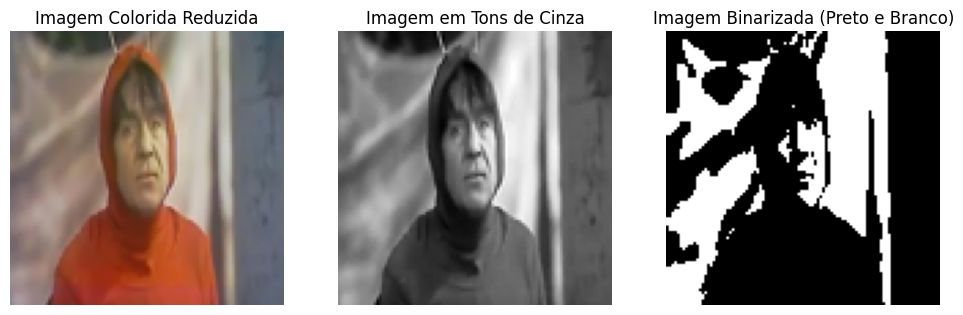

In [14]:

# Agora utilizando o Matplotlib
from PIL import Image
import matplotlib.pyplot as plt

# Carregar a imagem e redimensioná-la para uma dimensão reduzida
imagem_original = Image.open(caminho_imagem).convert("RGB")
imagem_reduzida = imagem_original.resize((100, 100))  # Reduzindo para 100x100 pixels

# Converter para tons de cinza
imagem_cinza = imagem_reduzida.convert("L")

# Converter para imagem binária (preto e branco) com threshold
threshold = 128
imagem_binaria = imagem_cinza.point(lambda p: 255 if p >= threshold else 0)

# Exibir as imagens com matplotlib
plt.figure(figsize=(12, 4))

# Imagem original reduzida
plt.subplot(1, 3, 1)
plt.imshow(imagem_reduzida)
plt.title("Imagem Colorida Reduzida")
plt.axis("off")

# Imagem em tons de cinza
plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap="gray")
plt.title("Imagem em Tons de Cinza")
plt.axis("off")

# Imagem binarizada
plt.subplot(1, 3, 3)
plt.imshow(imagem_binaria, cmap="gray")
plt.title("Imagem Binarizada (Preto e Branco)")
plt.axis("off")

plt.show()
